# RQ3: DINs Evolution

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Define a mapping from RI columns to DN categories in the order of DIN_labels
dn_mapping = {
    'AS': ['AS1'],
    'MI': ['MI1'],
    'IN': ['IN1'],
    'II': ['II1'],
    'LE': ['LE1', 'LE2'],
    'OR': ['OR1', 'OR2', 'OR3', 'OR4', 'OR5'],
    'FI': ['FI1'],
    'EH': ['EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9']
}

Reading the results of the taxonomy

In [3]:
sentence_analysis_df = pd.read_excel(f'../../RQ2_Taxonomy/results/sentences_classified.xlsx')

Plotting the number of posts and posts with accepted answer of each DIN by Year

C:\Users\shern\AppData\Local\Temp\ipykernel_23052\3158352923.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


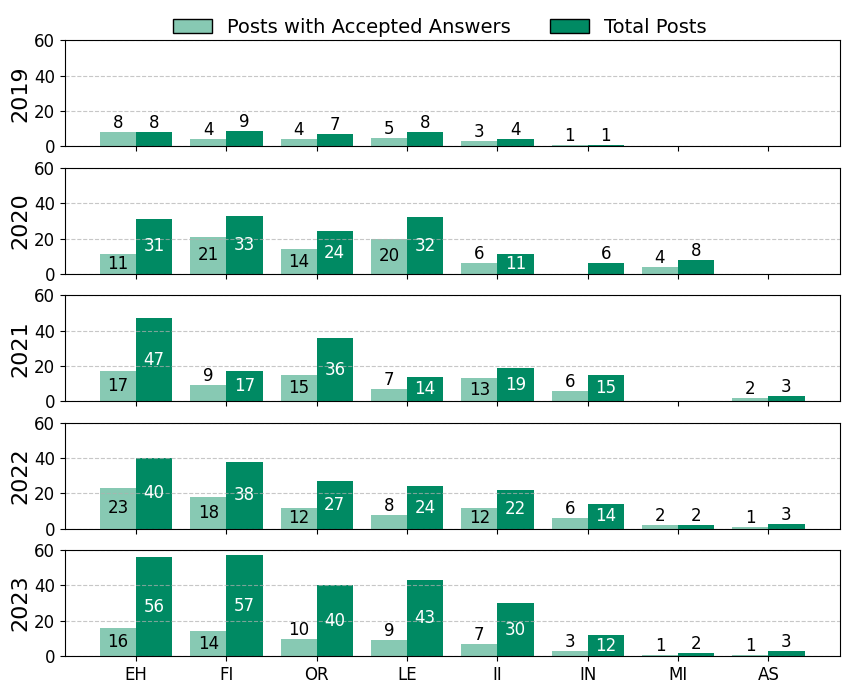

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming 'creation_date' is already in datetime format
sentence_analysis_df['creation_date'] = pd.to_datetime(sentence_analysis_df['creation_date'])

# Extract year from 'creation_date'
sentence_analysis_df['year'] = sentence_analysis_df['creation_date'].dt.year

# Group by post_id to get unique posts
grouped_df = sentence_analysis_df.groupby('post_id').agg({
    'EH1': 'max', 'EH2': 'max', 'EH3': 'max', 'EH4': 'max', 'EH5': 'max', 'EH6': 'max', 'EH7': 'max', 'EH8': 'max', 'EH9': 'max',
    'IN1': 'max', 'II1': 'max', 'MI1': 'max', 'FI1': 'max',
    'OR1': 'max', 'OR2': 'max', 'OR3': 'max', 'OR4': 'max', 'OR5': 'max',
    'AS1': 'max', 'LE1': 'max', 'LE2': 'max',
    #'RT': 'mean',  # Average response time (RT) for the post in seconds
    'accepted_answer_id': 'max',  # To check if the post has an accepted answer
    'year': 'first'  # Use the year from the first sentence of the post
}).reset_index()

# Convert RT from seconds to days (1 day = 86400 seconds)
#grouped_df['RT'] = grouped_df['RT'] / 86400

# Ensure the correct order of DINs based on DIN_labels
DIN_labels = ['EH', 'FI', 'OR', 'LE', 'II', 'IN', 'MI', 'AS']

# Initialize dictionaries to store post counts and accepted answer percentages by year for each DN
posts_data = {year: [] for year in range(2019, 2024)}
accepted_data = {year: [] for year in range(2019, 2024)}  # Number of accepted posts

# Iterate over each year and follow the correct order of DIN_labels
for year in range(2019, 2024):
    posts_data[year] = []  # Reset total posts data for the year
    accepted_data[year] = []  # Reset accepted posts data for the year
    
    # Collect data in the order specified by DIN_labels
    for dn in DIN_labels:
        ri_list = dn_mapping[dn]  # Get the corresponding RIs for each DN

        # Filter unique posts for each DN and year by checking if any RI columns corresponding to the DN are 1
        filtered_df = grouped_df[(grouped_df[ri_list].sum(axis=1) > 0) & (grouped_df['year'] == year)]

        num_posts = filtered_df.shape[0]
        num_accepted = filtered_df['accepted_answer_id'].notnull().sum()  # Count non-null accepted answers

        # Append data to lists in the order of DIN_labels
        posts_data[year].append(num_posts)
        accepted_data[year].append(num_accepted)

# Step 3: Plot the Data in a column layout with reduced height
fig, axes = plt.subplots(5, 1, figsize=(10, 8), sharey=True, gridspec_kw={'hspace': 0.2})  # Reduced height and more space between plots

# Define darker and lighter mint colors for the bar plots
total_post_color = '#008A63'  # Dark mint color for total posts
accepted_post_color = '#87C9B3'  # Light mint color for accepted posts

# Increase font sizes
font_size_ticks = 12
font_size_labels = 16
font_size_title = 18
font_size_legend = 14
font_size_annotations = 12

# Plot total posts and accepted answers in front of each other
for i, year in enumerate(range(2019, 2024)):
    num_posts = posts_data[year]
    num_accepted = accepted_data[year]
    
    # Create vertical bar plots for total posts
    total_bars = axes[i].bar(DIN_labels, num_posts, color=total_post_color, width=0.4, label='Total Posts', align='edge')

    # Create vertical bar plots for accepted answers (in front of the total posts)
    accepted_bars = axes[i].bar(DIN_labels, num_accepted, color=accepted_post_color, width=-0.4, label='Accepted Answers', align='edge')

    # Add labels to the accepted bars (black letters)
    for accepted_bar in accepted_bars:
        accepted_height = round(accepted_bar.get_height())
        if accepted_height > 0:
            if accepted_height <= 10:
                # If bar height is smaller than 5, place the label above the bar
                axes[i].annotate(f'{int(accepted_height)}', 
                                 xy=(accepted_bar.get_x() + accepted_bar.get_width() / 2, accepted_height),
                                 ha='center', va='bottom', fontsize=font_size_annotations, color='black')
            else:
                # Place the label inside the bar
                axes[i].annotate(f'{int(accepted_height)}', 
                                 xy=(accepted_bar.get_x() + accepted_bar.get_width() / 2, accepted_height / 2),
                                 ha='center', va='center', fontsize=font_size_annotations, color='black')
            
    # Add labels to the total bars (white letters)
    for total_bar in total_bars:
        total_height = round(total_bar.get_height())
        if total_height > 0:
            if total_height <= 10:
                # If bar height is smaller than 5, place the label above the bar
                axes[i].annotate(f'{int(total_height)}', 
                                 xy=(total_bar.get_x() + total_bar.get_width() / 2, total_height),
                                 ha='center', va='bottom', fontsize=font_size_annotations, color='black')
            else:
                # Place the label inside the bar
                axes[i].annotate(f'{int(total_height)}', 
                                 xy=(total_bar.get_x() + total_bar.get_width() / 2, total_height / 2),
                                 ha='center', va='center', fontsize=font_size_annotations, color='white')

    # Set grid and remove x-ticks for all but the last plot
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    
    if i < len(axes) - 1:
        axes[i].tick_params(labelbottom=False, labelsize=font_size_ticks)  # Hide x-axis labels for all but the last plot
    else:
        axes[i].tick_params(labelsize=font_size_ticks)  # Set larger x-tick labels

    # Set the year on the left side as the y-axis label (rotated)
    axes[i].set_ylabel(f'{year}', rotation=90, labelpad=10, fontsize=font_size_labels, va='center')

    # Set y-axis limits (same limit for consistency across all plots)
    axes[i].set_ylim(0, 60)

# Set a common x-axis label
axes[-1].set_xlabel('', fontsize=font_size_labels)

# Adjust the layout
plt.tight_layout()

# Add the legend at the top of the plot
fig.legend(handles=[
    Patch(facecolor=accepted_post_color, edgecolor='black', label='Posts with Accepted Answers'),
    Patch(facecolor=total_post_color, edgecolor='black', label='Total Posts'),
], loc='upper center', bbox_to_anchor=(0.5, 0.93), ncol=2, frameon=False, fontsize=font_size_legend)

# Save and display the plot
plt.subplots_adjust(top=0.88)
plt.savefig('../figs/DN_Post_Counts_and_Accepted_Answers.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
